## Data fit
### Lagrangeov interpolacijski polinom
$$f(x)=f_1 \lambda_1(x)+f_2 \lambda_2(x)+...+f_n \lambda_n(x)$$
$$ \lambda_i(x)= \displaystyle \prod_{j(\neq i)=1}^{n} \dfrac{x-x_j}{x_i-x_j} = \dfrac{x-x_1}{x_i-x_1}\dfrac{x-x_2}{x_i-x_2} \cdot \cdot \cdot \dfrac{x-x_n}{x_i-x_n}$$

#### Primjer: 
U tabeli su dati podaci za diferencijalni presjek na različitim energijama (tabela). Koristeći Lagrangeov interpolacijski polinom trećeg i osmog reda, izvršiti interpolaciju u tačakama između 0 i 200 MeV. Uporediti dobijeni rezultat sa teorijskom krivuljom.

<table style="width:100%">
  <tr>
    <th>$E(MeV)$</th>
    <th>0</th> 
    <th>25</th>
    <th>50</th> 
    <th>75</th>
    <th>100</th> 
      <th>125</th>
      <th>150</th> 
    <th>175</th>
      <th>200</th>
  </tr>
  <tr>
    <th>$\sigma_{exp} (mb)$</th>
    <th>10.6</th> 
    <th>16.0</th>
    <th>45.0</th> 
    <th>83.5</th>
    <th>52.8</th> 
      <th>19.9</th>
      <th>10.8</th> 
    <th>8.25</th>
      <th>4.7</th>
  </tr>
  <tr>
    <th>$\sigma_{th}(mb)$</th>
    <th>9.34</th> 
    <th>17.9</th>
    <th>41.5</th> 
    <th>85.5</th>
    <th>51.5</th> 
      <th>21.5</th>
      <th>10.8</th> 
    <th>6.29</th>
      <th>4.09</th>
  </tr>
</table>

In [1]:
import numpy as np

In [11]:
# Interpolacija Lagrnageovim polinomom trećeg reda
# f(x)=ax^3+bx^2+cx+d
x=[0,25,50,75,100,125,150,175,200]
x_tab=x
yexp=[10.6,16,45,83.5,52.8,19.9,10.8,8.25,4.7]
x_new=np.arange(0,200,1)
N1=3 #red polinoma
i=9; j=9;
#i=len(x);j=i;
#koeficijenti lambda

def lamb(x_new,x_tab,N):
    labmda=np.ones((1,N))
    for i in range(0,N):
        for j in range(0,len(x_tab)):
            if i != j:
                labmda[0,i]=labmda[0,i]*(x_new-x_tab[j])/(x_tab[i]-x_tab[j])
                
    return labmda   

In [12]:
lamda=[]
y_int=[]
yINT=[]
for x1 in x_new:
    lamda=lamb(x1,x_tab,9)
    y_int.append(yexp*lamda)
for i in range(0,len(y_int)):
    yINT.append(np.sum(y_int[i]))

/home/rifat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # This is added back by InteractiveShellApp.init_path()


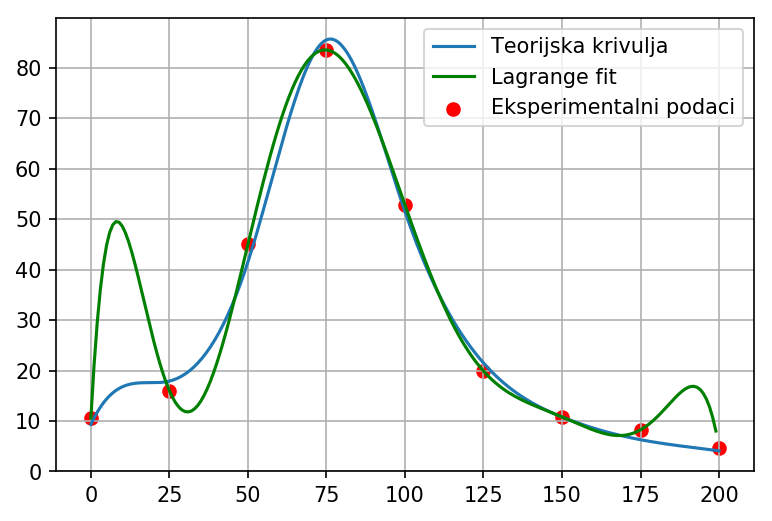

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

yth=[9.34,17.9,41.5,85.5,51.5,21.5,10.8,6.29,4.09]
xx=[0,25,50,75,100,125,150,175,200]

from scipy.interpolate import spline

xnew = np.linspace(min(xx),max(xx),300) #300 represents number of points to make between T.min and T.max

power_smooth = spline(xx,yth,xnew)

plt.figure(dpi=150)
plt.plot(xnew,power_smooth,label='Teorijska krivulja')
plt.scatter(xx,yexp,color='r',label='Eksperimentalni podaci')
plt.plot(x_new,yINT,color='g',label='Lagrange fit')
plt.legend()
plt.grid()
plt.show()